In [4]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))
getwd()

[1] "/mnt/hdd/develop/kaggle/R_sources/house_prices"

In [5]:
source('main.R')
house_prices$helpers$import_libs()

combined_dataset <- house_prices$helpers$load_data()

combined_dataset_fixed <-
    combined_dataset %>%
    (house_prices$missing$categ$replace_with_most_common) %>%
    (house_prices$missing$categ$fix_valid) %>%
    (house_prices$missing$numeric$replace_with_zero)

combined_dataset_fixed %>% purrr::map(~sum(is.na(.)) > 0) %>% purrr::keep(~.)

$SalePrice
[1] TRUE

In [66]:
categ_data <- 
    combined_dataset_fixed %>%
    # select categ vars
    select(house_prices$helpers$get_character_colnames(combined_dataset_fixed), SalePrice, -dataSource) %>%
    # drop weak categ vars
    select(-one_of(house_prices$attributes_selection$discared_cat_vars)) %>%
    filter(!is.na(SalePrice)) %>%
    mutate(
        price_log = log(SalePrice)
    ) %>%
    select(-SalePrice)

categ_data %>% colnames %>% sort

[1] "Alley"         "BldgType"      "BsmtCond"      "BsmtExposure" 
 [5] "BsmtFinType1"  "BsmtQual"      "CentralAir"    "Electrical"   
 [9] "Exterior1st"   "Exterior2nd"   "ExterQual"     "Fence"        
[13] "FireplaceQu"   "Foundation"    "GarageCond"    "GarageFinish" 
[17] "GarageQual"    "GarageType"    "HeatingQC"     "HouseStyle"   
[21] "KitchenQual"   "LandContour"   "LotConfig"     "LotShape"     
[25] "MasVnrType"    "MiscFeature"   "MSSubClass"    "MSZoning"     
[29] "Neighborhood"  "PavedDrive"    "PoolQC"        "price_log"    
[33] "RoofStyle"     "SaleCondition" "SaleType"

In [70]:
xxx <-
    categ_data %>%
    select(BldgType, price_log) %>%
    group_by(BldgType) %>%
    summarise(
        n = n(),
        mean = mean(price_log)
    ) %>%
    arrange(mean)

In [71]:
xxx

BldgType,n,mean
2fmCon,31,11.72535
Twnhs,43,11.77391
Duplex,52,11.78092
1Fam,1220,12.04751
TwnhsE,114,12.05945


In [72]:
order_factor_by_target <- house_prices$attributes_selection$order_factor_by_target

In [73]:
order_factor_by_target(
    df = categ_data %>% select(BldgType, price_log), 
    factor_var = BldgType, 
    target_var = price_log
)$BldgType %>% levels

[1] "2fmCon" "Twnhs"  "Duplex" "1Fam"   "TwnhsE"

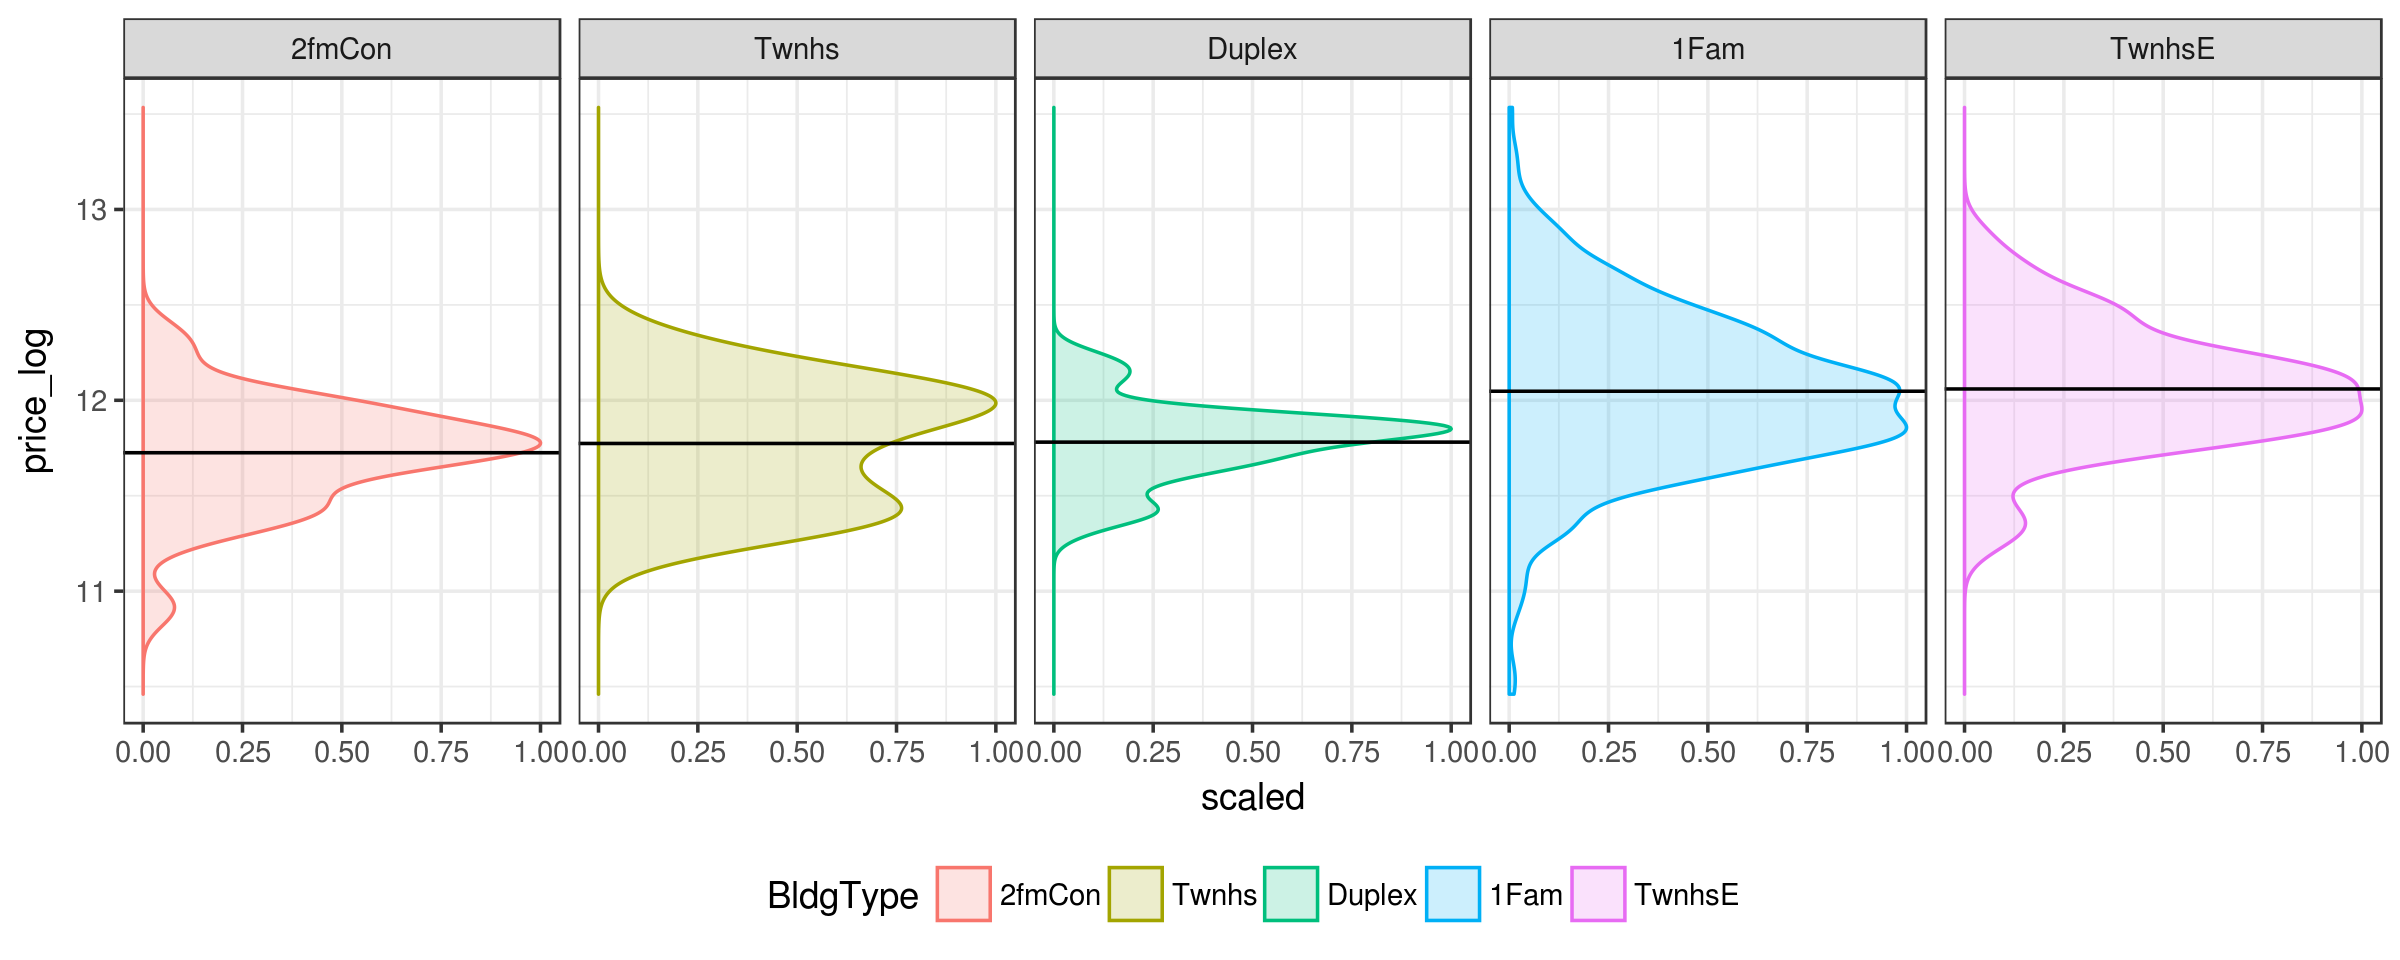

In [81]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res=240)

order_factor_by_target(
    df = categ_data %>% select(BldgType, price_log), 
    factor_var = BldgType, 
    target_var = price_log
) -> aaa

aaa %>%
select(BldgType, price_log) %>%
group_by(BldgType) %>%
summarise(
    n = n(),
    mean = mean(price_log)
) -> bbb

aaa %>% 
ggplot() +
geom_density(aes(price_log, y=..scaled.., fill=BldgType, color=BldgType), alpha=0.2) +
facet_wrap(~BldgType, nrow=1) +
geom_vline(aes(xintercept=mean), data=bbb) +
coord_flip() +
theme_bw() +
theme(legend.position="bottom")